## Structured and time series data

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.structured import *
from fastai.column_data import *
np.set_printoptions(threshold=50, edgeitems=20)

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/paperspace/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/paperspace/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/paperspace/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy m

In [3]:
PATH = "data/walmart/"

### Create datasets

In [4]:
os.listdir(PATH)

['stores.csv',
 'features.csv',
 'joined_train',
 'sampleSubmission.csv',
 'models',
 'joined_test',
 'train.csv',
 'test.csv',
 'tmp']

In [5]:
tables = ['stores','features','train','test']

In [6]:
tables = [pd.read_csv(f"{PATH}{fname}.csv") for fname in tables]

In [7]:
from IPython.display import HTML

In [8]:
for t in tables:
    display(t.head())

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [9]:
for t in tables:
    display(DataFrameSummary(t).summary())

,Store,Type,Size
count,45,NaN,45
mean,23,NaN,130288
std,13.1339,NaN,63825.3
min,1,NaN,34875
25%,12,NaN,70713
50%,23,NaN,126512
75%,34,NaN,202307
max,45,NaN,219622
counts,45,45,45
uniques,45,3,40


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
count,8190,NaN,8190,8190,4032,2921,3613,3464,4050,7605,7605,NaN
mean,23,NaN,59.3562,3.40599,7032.37,3384.18,1760.1,3292.94,4132.22,172.461,7.82682,NaN
std,12.988,NaN,18.6786,0.431337,9262.75,8793.58,11276.5,6792.33,13086.7,39.7383,1.87726,NaN
min,1,NaN,-7.29,2.472,-2781.45,-265.76,-179.26,0.22,-185.17,126.064,3.684,NaN
25%,12,NaN,45.9025,3.041,1577.53,68.88,6.6,304.688,1440.83,132.365,6.634,NaN
50%,23,NaN,60.71,3.513,4743.58,364.57,36.26,1176.42,2727.14,182.764,7.806,NaN
75%,34,NaN,73.88,3.743,8923.31,2153.35,163.15,3310.01,4832.56,213.932,8.567,NaN
max,45,NaN,101.95,4.468,103185,104520,149483,67474.9,771448,228.976,14.313,NaN
counts,8190,8190,8190,8190,4032,2921,3613,3464,4050,7605,7605,8190
uniques,45,182,4178,1011,4023,2715,2885,3405,4045,2505,404,2


,Store,Dept,Date,Weekly_Sales,IsHoliday
count,421570,421570,NaN,421570,NaN
mean,22.2005,44.2603,NaN,15981.3,NaN
std,12.7853,30.4921,NaN,22711.2,NaN
min,1,1,NaN,-4988.94,NaN
25%,11,18,NaN,2079.65,NaN
50%,22,37,NaN,7612.03,NaN
75%,33,74,NaN,20205.9,NaN
max,45,99,NaN,693099,NaN
counts,421570,421570,421570,421570,421570
uniques,45,81,143,359464,2


,Store,Dept,Date,IsHoliday
count,115064,115064,NaN,NaN
mean,22.2382,44.3395,NaN,NaN
std,12.8099,30.6564,NaN,NaN
min,1,1,NaN,NaN
25%,11,18,NaN,NaN
50%,22,37,NaN,NaN
75%,33,74,NaN,NaN
max,45,99,NaN,NaN
counts,115064,115064,115064,115064
uniques,45,81,39,2


### Data Cleaning / Feature Engineering

In [10]:
stores,features,train,test = tables

In [11]:
len(train), len(test)

(421570, 115064)

join_df is a function for joining tables on specific fields. By default, we'll be doing a left outer join of right on the left argument using the given fields for each table.

Pandas does joins using the merge method. The suffixes argument describes the naming convention for duplicate fields. We've elected to leave the duplicate field names on the left untouched, and append a "_y" to those on the right.

In [12]:
def join_df(left, right, left_on, right_on=None, suffix='_y'):
    if right_on is None:
        right_on = left_on
    return left.merge(right, how='left', left_on=left_on, right_on=right_on,suffixes=("",suffix))

Join train and test tables with the store table


In [13]:
joined_train = join_df(train, stores,'Store')

In [14]:
joined_train.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,False,A,151315
1,1,1,2010-02-12,46039.49,True,A,151315
2,1,1,2010-02-19,41595.55,False,A,151315
3,1,1,2010-02-26,19403.54,False,A,151315
4,1,1,2010-03-05,21827.90,False,A,151315
5,1,1,2010-03-12,21043.39,False,A,151315
6,1,1,2010-03-19,22136.64,False,A,151315
7,1,1,2010-03-26,26229.21,False,A,151315
8,1,1,2010-04-02,57258.43,False,A,151315
9,1,1,2010-04-09,42960.91,False,A,151315


In [15]:
joined_test = join_df(test, stores, 'Store')

In [16]:
joined_test.head(10)

,Store,Dept,Date,IsHoliday,Type,Size
0,1,1,2012-11-02,False,A,151315
1,1,1,2012-11-09,False,A,151315
2,1,1,2012-11-16,False,A,151315
3,1,1,2012-11-23,True,A,151315
4,1,1,2012-11-30,False,A,151315
5,1,1,2012-12-07,False,A,151315
6,1,1,2012-12-14,False,A,151315
7,1,1,2012-12-21,False,A,151315
8,1,1,2012-12-28,True,A,151315
9,1,1,2013-01-04,False,A,151315


Join the features table with train and test data

In [17]:
joined_train = join_df(joined_train,features,['Store','Date'])

In [18]:
joined_test = join_df(joined_test,features,['Store','Date'])

In [19]:
joined_train.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
5,1,1,2010-03-12,21043.39,False,A,151315,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False
6,1,1,2010-03-19,22136.64,False,A,151315,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False
7,1,1,2010-03-26,26229.21,False,A,151315,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False
8,1,1,2010-04-02,57258.43,False,A,151315,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False
9,1,1,2010-04-09,42960.91,False,A,151315,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False


In [20]:
joined_test.head(10)

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,False
1,1,1,2012-11-09,False,A,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,False
2,1,1,2012-11-16,False,A,151315,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,False
3,1,1,2012-11-23,True,A,151315,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,True
4,1,1,2012-11-30,False,A,151315,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573,False
5,1,1,2012-12-07,False,A,151315,64.12,3.198,6343.16,NaN,270.00,2928.90,10147.90,223.660021,6.573,False
6,1,1,2012-12-14,False,A,151315,48.89,3.168,3504.83,NaN,73.26,1636.80,2779.60,223.719277,6.573,False
7,1,1,2012-12-21,False,A,151315,56.02,3.098,8231.71,NaN,274.00,358.15,2834.02,223.839845,6.573,False
8,1,1,2012-12-28,True,A,151315,44.79,3.108,12659.55,37101.13,174.78,74.46,1208.86,223.960414,6.573,True
9,1,1,2013-01-04,False,A,151315,41.73,3.161,1214.08,25366.33,15.01,72.36,3940.02,224.080983,6.525,False


In [21]:
for df in(joined_train,joined_test):
    display(DataFrameSummary(df).summary())

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
count,421570,421570,NaN,421570,NaN,NaN,421570,421570,421570,150681,111248,137091,134967,151432,421570,421570,NaN
mean,22.2005,44.2603,NaN,15981.3,NaN,NaN,136728,60.0901,3.36103,7246.42,3334.63,1439.42,3383.17,4628.98,171.202,7.96029,NaN
std,12.7853,30.4921,NaN,22711.2,NaN,NaN,60980.6,18.4479,0.458515,8291.22,9475.36,9623.08,6292.38,5962.89,39.1593,1.8633,NaN
min,1,1,NaN,-4988.94,NaN,NaN,34875,-2.06,2.472,0.27,-265.76,-29.1,0.22,135.16,126.064,3.879,NaN
25%,11,18,NaN,2079.65,NaN,NaN,93638,46.68,2.933,2240.27,41.6,5.08,504.22,1878.44,132.023,6.891,NaN
50%,22,37,NaN,7612.03,NaN,NaN,140167,62.09,3.452,5347.45,192,24.6,1481.31,3359.45,182.319,7.866,NaN
75%,33,74,NaN,20205.9,NaN,NaN,202505,74.28,3.738,9210.9,1926.94,103.99,3595.04,5563.8,212.417,8.572,NaN
max,45,99,NaN,693099,NaN,NaN,219622,100.14,4.468,88646.8,104520,141631,67474.9,108519,227.233,14.313,NaN
counts,421570,421570,421570,421570,421570,421570,421570,421570,421570,150681,111248,137091,134967,151432,421570,421570,421570
uniques,45,81,143,359464,2,3,40,3528,892,2277,1499,1662,1944,2293,2145,349,2


,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
count,115064,115064,NaN,NaN,NaN,115064,115064,115064,114915,86437,105235,102176,115064,76902,76902,NaN
mean,22.2382,44.3395,NaN,NaN,NaN,136498,53.9418,3.58155,7689.22,3734.05,2403.09,3356.22,3922.68,176.961,6.86873,NaN
std,12.8099,30.6564,NaN,NaN,NaN,61106.9,18.7242,0.239442,10698.8,8323.5,13767.9,7570.5,19445.2,41.24,1.58343,NaN
min,1,1,NaN,NaN,NaN,34875,-7.29,2.872,-2781.45,-35.74,-179.26,0.22,-185.17,131.236,3.684,NaN
25%,11,18,NaN,NaN,NaN,93638,39.82,3.431,1966.46,180.35,15.1,155.46,1309.3,138.402,5.771,NaN
50%,22,37,NaN,NaN,NaN,140167,54.47,3.606,4842.29,742.59,78.26,840.94,2390.43,192.304,6.806,NaN
75%,33,74,NaN,NaN,NaN,202505,67.35,3.766,9439.14,2735.67,272.58,3096.92,4227.27,223.245,8.036,NaN
max,45,99,NaN,NaN,NaN,219622,101.95,4.125,103185,71074.2,149483,65344.6,771448,228.976,10.199,NaN
counts,115064,115064,115064,115064,115064,115064,115064,115064,114915,86437,105235,102176,115064,76902,76902,115064
uniques,45,81,39,2,3,40,1236,297,1752,1257,1421,1483,1754,360,89,2


The following extracts particular date fields from a complete datetime for the purpose of constructing categoricals.

You should always consider this feature extraction step when working with date-time. Without expanding your date-time into these additional fields, you can't capture any trend/cyclical behavior as a function of time at any of these granularities. We'll add to every table with a date field.

In [22]:
add_datepart(joined_train,"Date",drop=False)
add_datepart(joined_test,"Date",drop=False)

In [23]:
joined_train.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,...,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,...,5,4,36,False,False,False,False,False,False,1265328000
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,...,12,4,43,False,False,False,False,False,False,1265932800
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,...,19,4,50,False,False,False,False,False,False,1266537600
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,...,26,4,57,False,False,False,False,False,False,1267142400
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,...,5,4,64,False,False,False,False,False,False,1267747200


In [24]:
joined_test.head(5)

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.70,...,2,4,307,False,False,False,False,False,False,1351814400
1,1,1,2012-11-09,False,A,151315,61.24,3.314,11421.32,3370.89,...,9,4,314,False,False,False,False,False,False,1352419200
2,1,1,2012-11-16,False,A,151315,52.92,3.252,9696.28,292.10,...,16,4,321,False,False,False,False,False,False,1353024000
3,1,1,2012-11-23,True,A,151315,56.23,3.211,883.59,4.17,...,23,4,328,False,False,False,False,False,False,1353628800
4,1,1,2012-11-30,False,A,151315,52.34,3.207,2460.03,NaN,...,30,4,335,True,False,False,False,False,False,1354233600


Dropping duplicate columns created with the prefix _y

In [25]:
for df in (joined_train, joined_test):
    for c in df.columns:
        if(c.endswith('_y')):
            if(c in df.columns):
                df.drop(c, inplace=True, axis=1)

In [26]:
joined_train[1:5]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,...,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,...,12,4,43,False,False,False,False,False,False,1265932800
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,...,19,4,50,False,False,False,False,False,False,1266537600
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,...,26,4,57,False,False,False,False,False,False,1267142400
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,...,5,4,64,False,False,False,False,False,False,1267747200


In [27]:
joined_test[1:5]

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
1,1,1,2012-11-09,False,A,151315,61.24,3.314,11421.32,3370.89,...,9,4,314,False,False,False,False,False,False,1352419200
2,1,1,2012-11-16,False,A,151315,52.92,3.252,9696.28,292.10,...,16,4,321,False,False,False,False,False,False,1353024000
3,1,1,2012-11-23,True,A,151315,56.23,3.211,883.59,4.17,...,23,4,328,False,False,False,False,False,False,1353628800
4,1,1,2012-11-30,False,A,151315,52.34,3.207,2460.03,NaN,...,30,4,335,True,False,False,False,False,False,1354233600


We drop all rows that have Weekly Sales less than or equal to zero

In [28]:
joined_train = joined_train[joined_train.Weekly_Sales > 0]

Next we'll fill in missing values to avoid complications with NA's. NA (not available) is how Pandas indicates missing values; many models have problems when missing values are present, so it's always important to think about how to deal with them.

In [29]:
joined_train['MarkDown1'] = joined_train.MarkDown1.fillna(7246.42).astype(np.float64)
joined_train['MarkDown2'] = joined_train.MarkDown2.fillna(3334.63).astype(np.float64)
joined_train['MarkDown3'] = joined_train.MarkDown3.fillna(1439.42).astype(np.float64)
joined_train['MarkDown4'] = joined_train.MarkDown4.fillna(3383.17).astype(np.float64)
joined_train['MarkDown5'] = joined_train.MarkDown5.fillna(4628.98).astype(np.float64)             

In [30]:
joined_test['MarkDown1'] = joined_test.MarkDown1.fillna(7689.22).astype(np.float64)
joined_test['MarkDown2'] = joined_test.MarkDown2.fillna(3734.05).astype(np.float64)
joined_test['MarkDown3'] = joined_test.MarkDown3.fillna(2403.09).astype(np.float64)
joined_test['MarkDown4'] = joined_test.MarkDown4.fillna(3356.22).astype(np.float64)
joined_test['MarkDown5'] = joined_test.MarkDown5.fillna(3922.68).astype(np.float64)  

In [31]:
joined_test['CPI'] = joined_test.CPI.fillna(176.9).astype(np.float64)
joined_test['Unemployment'] = joined_test.Unemployment.fillna(6.9).astype(np.float64)

In [32]:
joined_train.isna().values.any(), joined_test.Year

(False, 0         2012
 1         2012
 2         2012
 3         2012
 4         2012
 5         2012
 6         2012
 7         2012
 8         2012
 9         2013
 10        2013
 11        2013
 12        2013
 13        2013
 14        2013
 15        2013
 16        2013
 17        2013
 18        2013
 19        2013
 20        2013
 21        2013
 22        2013
 23        2013
 24        2013
 25        2013
 26        2013
 27        2013
 28        2013
 29        2013
           ... 
 115034    2013
 115035    2013
 115036    2013
 115037    2013
 115038    2013
 115039    2013
 115040    2013
 115041    2013
 115042    2013
 115043    2013
 115044    2013
 115045    2013
 115046    2013
 115047    2013
 115048    2013
 115049    2013
 115050    2013
 115051    2013
 115052    2013
 115053    2013
 115054    2013
 115055    2013
 115056    2013
 115057    2013
 115058    2013
 115059    2013
 115060    2013
 115061    2013
 115062    2013
 115063    2013
 Name: Year, Leng

In [33]:
joined_test.Year.isna()

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
115034    False
115035    False
115036    False
115037    False
115038    False
115039    False
115040    False
115041    False
115042    False
115043    False
115044    False
115045    False
115046    False
115047    False
115048    False
115049    False
115050    False
115051    False
115052    False
115053    False
115054    False
115055    False
115056    False
115057    False
115058    False
115059    False
115060    False
115061    False
115062    False
115063    False
Name: Year, Length: 1150

In [34]:
joined_train.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,...,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,7246.42,...,5,4,36,False,False,False,False,False,False,1265328000
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,7246.42,...,12,4,43,False,False,False,False,False,False,1265932800
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,7246.42,...,19,4,50,False,False,False,False,False,False,1266537600
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,7246.42,...,26,4,57,False,False,False,False,False,False,1267142400
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,7246.42,...,5,4,64,False,False,False,False,False,False,1267747200


In [35]:
joined_test.head(5)

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.70,...,2,4,307,False,False,False,False,False,False,1351814400
1,1,1,2012-11-09,False,A,151315,61.24,3.314,11421.32,3370.89,...,9,4,314,False,False,False,False,False,False,1352419200
2,1,1,2012-11-16,False,A,151315,52.92,3.252,9696.28,292.10,...,16,4,321,False,False,False,False,False,False,1353024000
3,1,1,2012-11-23,True,A,151315,56.23,3.211,883.59,4.17,...,23,4,328,False,False,False,False,False,False,1353628800
4,1,1,2012-11-30,False,A,151315,52.34,3.207,2460.03,3734.05,...,30,4,335,True,False,False,False,False,False,1354233600


In [37]:
joined_train.reset_index()
joined_test.reset_index()

,index,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,...,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
0,0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,...,2,4,307,False,False,False,False,False,False,1351814400
1,1,1,1,2012-11-09,False,A,151315,61.24,3.314,11421.32,...,9,4,314,False,False,False,False,False,False,1352419200
2,2,1,1,2012-11-16,False,A,151315,52.92,3.252,9696.28,...,16,4,321,False,False,False,False,False,False,1353024000
3,3,1,1,2012-11-23,True,A,151315,56.23,3.211,883.59,...,23,4,328,False,False,False,False,False,False,1353628800
4,4,1,1,2012-11-30,False,A,151315,52.34,3.207,2460.03,...,30,4,335,True,False,False,False,False,False,1354233600
5,5,1,1,2012-12-07,False,A,151315,64.12,3.198,6343.16,...,7,4,342,False,False,False,False,False,False,1354838400
6,6,1,1,2012-12-14,False,A,151315,48.89,3.168,3504.83,...,14,4,349,False,False,False,False,False,False,1355443200
7,7,1,1,2012-12-21,False,A,151315,56.02,3.098,8231.71,...,21,4,356,False,False,False,False,False,False,1356048000
8,8,1,1,2012-12-28,True,A,151315,44.79,3.108,12659.55,...,28,4,363,False,False,False,False,False,False,1356652800
9,9,1,1,2013-01-04,False,A,151315,41.73,3.161,1214.08,...,4,4,4,False,False,False,False,False,False,1357257600


In [38]:
len(joined_train), len(joined_test)

(420212, 115064)

In [39]:
joined_train.to_feather(f"{PATH}/joined_train")
joined_test.to_feather(f"{PATH}/joined_test")                        

ValueError: feather does not support serializing a non-default index for the index; you can .reset_index() to make the index into column(s)

### Durations

It is common when working with time series data to extract data that explains relationships across rows as opposed to columns, e.g.:

Running averages
Time until next event
Time since last event
This is often difficult to do with most table manipulation frameworks, since they are designed to work with relationships across columns. As such, we've created a class to handle this type of data.

We'll define a function get_elapsed for cumulative counting across a sorted dataframe. Given a particular field fld to monitor, this function will start tracking time since the last occurrence of that field. When the field is seen again, the counter is set to zero.

Upon initialization, this will result in datetime na's until the field is encountered. This is reset every time a new store is seen.

In [ ]:
def get_elapsed(field, pre):
    day1 = np.timedelta64(1,'D')
    last_date = np.datetime64()
    last_store = 0
    res = []
    
    for s,v,d in zip(df.Store.values, df[fld].values, df.Date.values):
        if s!=last_store:
            last_date = np.datetime64()
            last_store = s
        if v:
            last_date = d
        res.append(((d-last_date).astype('timedelta64[D]') / day1))
    df[pre+fld] = res

In [ ]:
fld = 'IsHoliday'
df = df.sort_values(['Store', 'Date'])
get_elapsed(fld, 'After')
df = df.sort_values(['Store', 'Date'], ascending=[True, False])
get_elapsed(fld, 'Before')

In [ ]:
df

Set the active index to Date.

In [ ]:
df = df.set_index("Date")

Then set null values from elapsed field calculations to 0.

In [ ]:
for o in ['BeforeIsHoliday','AfterIsHoliday']:
    df[o] = df[o].fillna(0).astype(int)

In [ ]:
columns = ['IsHoliday']

In [ ]:
bwd = df[['Store']+columns].sort_index().groupby("Store").rolling(7, min_periods=1).sum()

In [ ]:
fwd = df[['Store']+columns].sort_index(ascending=False).groupby("Store").rolling(7, min_periods=1).sum()

Keep this as is for now and move on to feature creation. Explore this part later

### Create Features

In [ ]:
joined_train = pd.read_feather(f'{PATH}joined_train')
joined_test = pd.read_feather(f'{PATH}joined_test')

In [40]:
DataFrameSummary(joined_test).summary()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
count,115064,115064,NaN,NaN,NaN,115064,115064,115064,115064,115064,...,115064,115064,115064,NaN,NaN,NaN,NaN,NaN,NaN,115064
mean,22.2382,44.3395,NaN,NaN,NaN,136498,53.9418,3.58155,7689.22,3734.05,...,15.5835,4,158.822,NaN,NaN,NaN,NaN,NaN,NaN,1.36327e+09
std,12.8099,30.6564,NaN,NaN,NaN,61106.9,18.7242,0.239442,10691.8,7214.15,...,8.8449,0,110.992,NaN,NaN,NaN,NaN,NaN,NaN,6.80764e+06
min,1,1,NaN,NaN,NaN,34875,-7.29,2.872,-2781.45,-35.74,...,1,4,4,NaN,NaN,NaN,NaN,NaN,NaN,1.35181e+09
25%,11,18,NaN,NaN,NaN,93638,39.82,3.431,1974.68,306.12,...,8,4,67,NaN,NaN,NaN,NaN,NaN,NaN,1.35726e+09
50%,22,37,NaN,NaN,NaN,140167,54.47,3.606,4842.66,1568.71,...,15,4,137,NaN,NaN,NaN,NaN,NaN,NaN,1.36331e+09
75%,33,74,NaN,NaN,NaN,202505,67.35,3.766,9427.41,3734.05,...,23,4,207,NaN,NaN,NaN,NaN,NaN,NaN,1.36935e+09
max,45,99,NaN,NaN,NaN,219622,101.95,4.125,103185,71074.2,...,31,4,363,NaN,NaN,NaN,NaN,NaN,NaN,1.3748e+09
counts,115064,115064,115064,115064,115064,115064,115064,115064,115064,115064,...,115064,115064,115064,115064,115064,115064,115064,115064,115064,115064
uniques,45,81,39,2,3,40,1236,297,1753,1258,...,27,1,39,2,2,1,1,1,1,39


In [41]:
joined_train.head().T.head(50)

,0,1,2,3,4
Store,1,1,1,1,1
Dept,1,1,1,1,1
Date,2010-02-05 00:00:00,2010-02-12 00:00:00,2010-02-19 00:00:00,2010-02-26 00:00:00,2010-03-05 00:00:00
Weekly_Sales,24924.5,46039.5,41595.6,19403.5,21827.9
IsHoliday,False,True,False,False,False
Type,A,A,A,A,A
Size,151315,151315,151315,151315,151315
Temperature,42.31,38.51,39.93,46.63,46.5
Fuel_Price,2.572,2.548,2.514,2.561,2.625
MarkDown1,7246.42,7246.42,7246.42,7246.42,7246.42



Now that we've engineered all our features, we need to convert to input compatible with a neural network.

This includes converting categorical variables into contiguous integers or one-hot encodings, normalizing continuous features to standard normal, etc...



In [42]:
dep = 'Weekly_Sales'

In [1]:
cat_vars = ['Store','Dept','IsHoliday','Type','Year','Month','Week','Day','Dayofweek','Dayofyear','Is_month_end','Is_month_start',
           'Is_quarter_end','Is_quarter_start','Is_year_end','Is_year_start']

contin_vars = ['Size','Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment',
           'Elapsed']

In [44]:
joined_train = joined_train[cat_vars+contin_vars+[dep, 'Date']].copy()

In [45]:
joined_test[dep] = 0
joined_test = joined_test[cat_vars+contin_vars+[dep, 'Date']].copy()

In [46]:
for v in cat_vars:
    joined_train[v] = joined_train[v].astype('category').cat.as_ordered()

In [47]:
apply_cats(joined_test, joined_train)

/home/paperspace/fastai/courses/dl1/fastai/structured.py:200: RuntimeWarning: None of the categories were found in values. Did you mean to use
'Categorical.from_codes(codes, categories)'?
  df[n] = pd.Categorical(c, categories=trn[n].cat.categories, ordered=True)


In [48]:
for v in contin_vars:
    joined_train[v] = joined_train[v].fillna(0).astype('float32')
    joined_test[v] = joined_test[v].fillna(0).astype('float32')

In [49]:
n = len(joined_train)
samp_size = n
joined_samp = joined_train.set_index("Date")

In [50]:
joined_samp.head(2)

,Store,Dept,IsHoliday,Type,Year,Month,Week,Day,Dayofweek,Dayofyear,...,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Elapsed,Weekly_Sales
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,False,A,2010,2,5,5,4,36,...,2.572,7246.419922,3334.629883,1439.420044,3383.169922,4628.97998,211.096359,8.106,1.265328e+09,24924.50
2010-02-12,1,1,True,A,2010,2,6,12,4,43,...,2.548,7246.419922,3334.629883,1439.420044,3383.169922,4628.97998,211.242172,8.106,1.265933e+09,46039.49


Since the year 2013 is not present in the training set and only in the test set, add it as a category in both the sets.

In [51]:
joined_samp['Year'] = joined_samp.Year.cat.add_categories(2013)

In [52]:
df, y, nas, mapper = proc_df(joined_samp, y_fld='Weekly_Sales',do_scale=True)
yl = np.log(y)

In [53]:
joined_test = joined_test.set_index('Date')

In [54]:
joined_test['Year'] = joined_test.Year.cat.add_categories(2013)

In [55]:
joined_test['Year'] = joined_test.Year.fillna(2013)

In [56]:
DataFrameSummary(joined_test).summary()

,Store,Dept,IsHoliday,Type,Year,Month,Week,Day,Dayofweek,Dayofyear,...,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Elapsed,Weekly_Sales
count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,115064,115064,115064,115064,115064,115064,115064,115064,115064,115064
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.58155,7689.22,3734.05,2403.09,3356.22,3922.68,176.941,6.8791,1.36327e+09,0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.239442,10691.8,7214.15,13166.8,7133.93,19445.2,33.7145,1.29457,6.80764e+06,0
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.872,-2781.45,-35.74,-179.26,0.22,-185.17,131.236,3.684,1.35181e+09,0
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.431,1974.68,306.12,18,200.48,1309.3,138.9,6.228,1.35726e+09,0
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.606,4842.66,1568.71,94.925,1239.78,2390.43,176.9,6.9,1.36331e+09,0
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.766,9427.41,3734.05,418.52,3356.22,4227.27,201.212,7.293,1.36935e+09,0
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.125,103185,71074.2,149483,65344.6,771448,228.976,10.199,1.3748e+09,0
counts,115064,115064,115064,115064,115064,115064,115064,115064,115064,0,...,115064,115064,115064,115064,115064,115064,115064,115064,115064,115064
uniques,45,81,2,3,2,9,39,27,1,0,...,297,1753,1258,1422,1484,1754,361,90,39,1


In [57]:
df_test, _, nas, mapper = proc_df(joined_test, 'Weekly_Sales', do_scale=True, mapper=mapper,na_dict=nas)

In [58]:
df.head(2)

,Store,Dept,IsHoliday,Type,Year,Month,Week,Day,Dayofweek,Dayofyear,...,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Elapsed
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,1,1,1,2,5,5,1,11,...,-0.963831,-1.720519,-0.000101,0.000244,-0.000137,-0.000145,-0.000055,1.018422,0.078331,-1.724429
2010-02-12,1,1,2,1,1,2,6,12,1,14,...,-1.169818,-1.772861,-0.000101,0.000244,-0.000137,-0.000145,-0.000055,1.022145,0.078331,-1.700206


In time series data, cross-validation is not random. Instead, our holdout data is generally the most recent data, as it would be in real application. 

In [59]:
train_ratio = 0.75
train_size = int(train_ratio * n); train_size
val_idx = list(range(train_size, len(df)))

### Deep Learning

We will use the Root Mean Square Percent Error(RMSPE) metric to calculate the error for this problem.

In [60]:
def inv_y(a):
    return np.exp(a)

def exp_rmspe(y_pred, targ):
    targ = inv_y(targ)
    pct_var = (targ - inv_y(y_pred))/targ
    return math.sqrt((pct_var**2).mean())

max_log_y = np.max(yl)
y_range = (0,max_log_y*1.2)

Get the ModelData object

In [61]:
md = ColumnarModelData.from_data_frame(PATH, val_idx, df, yl.astype(np.float64), cat_flds=cat_vars, bs=128, test_df=df_test)

Get the number of levels in each category

In [62]:
cat_sz = [(c,len(joined_samp[c].cat.categories)+1) for c in cat_vars]

In [63]:
cat_sz

[('Store', 46),
 ('Dept', 82),
 ('IsHoliday', 3),
 ('Type', 4),
 ('Year', 5),
 ('Month', 13),
 ('Week', 53),
 ('Day', 32),
 ('Dayofweek', 2),
 ('Dayofyear', 144),
 ('Is_month_end', 3),
 ('Is_month_start', 3),
 ('Is_quarter_end', 3),
 ('Is_quarter_start', 3),
 ('Is_year_end', 3),
 ('Is_year_start', 2)]

Get the embedding sizes for each of the various categories. 

In [64]:
emb_szs = [(c,min(50,(c+1)//2)) for _,c in cat_sz]

In [65]:
emb_szs

[(46, 23),
 (82, 41),
 (3, 2),
 (4, 2),
 (5, 3),
 (13, 7),
 (53, 27),
 (32, 16),
 (2, 1),
 (144, 50),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (2, 1)]

In [66]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars), 0.0004, 1, [1000,500], [0.001,0.01], y_range=y_range)

In [67]:
temp1, temp2, temp3 = next(iter(m.data.trn_dl))

In [68]:
temp1.size(), temp2.size(), temp3.size()

(torch.Size([128, 16]), torch.Size([128, 11]), torch.Size([128, 1]))

In [69]:
m.lr_find()

 61%|██████    | 1497/2463 [00:13<00:08, 112.35it/s, loss=2.76] 

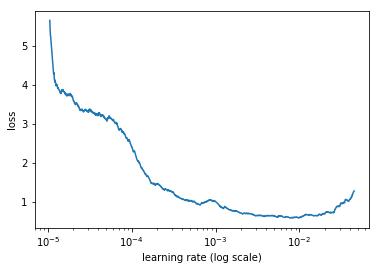

 61%|██████    | 1497/2463 [00:30<00:19, 49.90it/s, loss=2.76] 

In [70]:
m.sched.plot()

Fit the data using the learning rate calculated by the learning rate finder

In [71]:
m.fit(1e-3,4,metrics=[exp_rmspe])

epoch      trn_loss   val_loss   exp_rmspe                      
    0      0.289674   0.982085   13.167871 
    1      0.173941   0.931276   13.084943                      
    2      0.156494   0.952073   12.460839                      
    3      0.13019    1.054184   10.700707                      


[array([1.05418]), 10.700707446949675]

In [72]:
m.fit(1e-4, 2, metrics=[exp_rmspe], cycle_len=4)

epoch      trn_loss   val_loss   exp_rmspe                       
    0      0.098925   1.002055   11.329374 
    1      0.087049   0.987456   11.310059                       
    2      0.088683   1.004632   11.754225                       
    3      0.085325   1.004732   11.774549                       
    4      0.074157   1.030803   12.125616                       
    5      0.072584   1.037012   11.894859                       
    6      0.06865    1.01953    12.091814                       
    7      0.069309   1.028743   12.173108                       


[array([1.02874]), 12.173107806246676]

Predict the results of the test set using the predictor

In [73]:
results = m.predict_dl(m.data.test_dl)

In [74]:
predictions = np.exp(results)

In [76]:
joined_test['Weekly_Sales'] = predictions

In [77]:
joined_test.head()

,Store,Dept,IsHoliday,Type,Year,Month,Week,Day,Dayofweek,Dayofyear,...,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Elapsed,Weekly_Sales
Date,,,,,,,,,,,,,,,,,,,,,
2012-11-02,1,1,False,A,2012,11,44,2,4,NaN,...,3.386,6766.439941,5147.700195,50.820000,3639.899902,2737.419922,223.462784,6.573,1.351814e+09,25306.990234
2012-11-09,1,1,False,A,2012,11,45,9,4,NaN,...,3.314,11421.320312,3370.889893,40.279999,4646.790039,6154.160156,223.481308,6.573,1.352419e+09,22008.113281
2012-11-16,1,1,False,A,2012,11,46,16,4,NaN,...,3.252,9696.280273,292.100006,103.779999,1133.150024,6612.689941,223.512909,6.573,1.353024e+09,21950.744141
2012-11-23,1,1,True,A,2012,11,47,23,4,NaN,...,3.211,883.590027,4.170000,74910.320312,209.910004,303.320007,223.561951,6.573,1.353629e+09,18850.208984
2012-11-30,1,1,False,A,2012,11,48,30,4,NaN,...,3.207,2460.030029,3734.050049,3838.350098,150.570007,6966.339844,223.610977,6.573,1.354234e+09,20691.535156


Write the results into a csv file in the competition format for submission

In [78]:
csv_fn='/home/paperspace/data/walmart/tmp/sub_walmart.csv'

In [79]:
f = open(csv_fn,'w+')

In [80]:
f.write("Id,Weekly_Sales\n")

16

In [81]:
joined_test = joined_test.reset_index()

In [82]:
for _, row in joined_test.iterrows():
    f.writelines(str(row['Store']) + "_" + str(row['Dept']) + "_" + str(row['Date'].date()) + "," + str(row['Weekly_Sales'])+"\n")  

In [83]:
f.close()